In [1]:
# # For debugging purposes
# %load_ext autoreload
# %autoreload 2

# from IPython.core.interactiveshell import InteractiveShell

# InteractiveShell.ast_node_interactivity = "all"

In [2]:
import json

from pyprojroot import here

from calh.filter import CalendarFilter
from calh.visualization import Heatmap

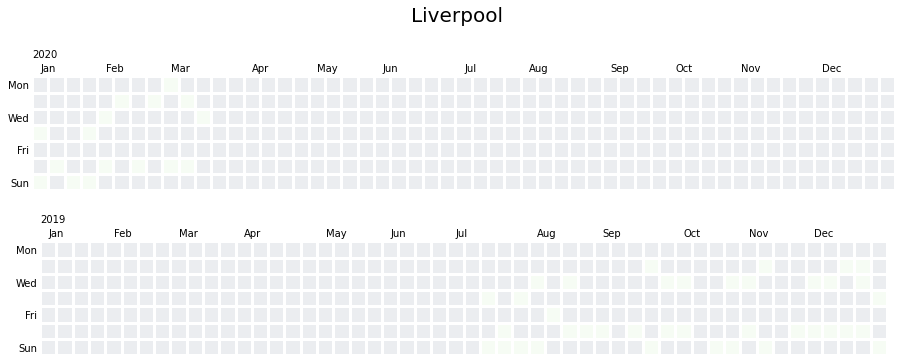

In [3]:
input_file = here() / "examples" / "data" / "raw" / "ics" / "liverpool.ics"
output_file = here() / "examples" / "data" / "processed" / "png" / "liverpool.png"
Heatmap.create(input_file=input_file, output_file=output_file, title="Liverpool")

In [4]:
def filter_calendar(
    input_file, output_file, start_date=None, end_date=None, re_pattern=None
):
    filtered_calendar = CalendarFilter(
        ics_file=input_file,
        re_pattern=re_pattern,
        start_date=start_date,
        end_date=end_date,
    )
    filtered_calendar.filter_calendars()

    with open(output_file, "w") as out_f:
        json.dump(filtered_calendar.result, out_f)

In [5]:
# Filter calendar

raw_data = here() / "examples" / "data" / "raw" / "ics" / "urlab.ics"
processed_data_single_year = (
    here() / "examples" / "data" / "processed" / "json" / "2015_urlab.json"
)
processed_data_multiple_year = (
    here() / "examples" / "data" / "processed" / "json" / "2015-2020_urlab.json"
)

# Interested only for workshop or tech
CalendarFilter.filter(
    input_file=raw_data,
    output_file=processed_data_single_year,
    re_pattern="tech",
    start_date="2015-01-01",
    end_date="2015-12-31",
)

CalendarFilter.filter(
    input_file=raw_data,
    output_file=processed_data_multiple_year,
    start_date="2015-01-01",
    end_date="2020-01-01",
)

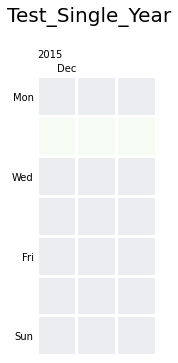

In [6]:
single_hmap = Heatmap(input=processed_data_single_year, full_year=False)
single_hmap.draw(title="test_single_year", width=10, height=5)

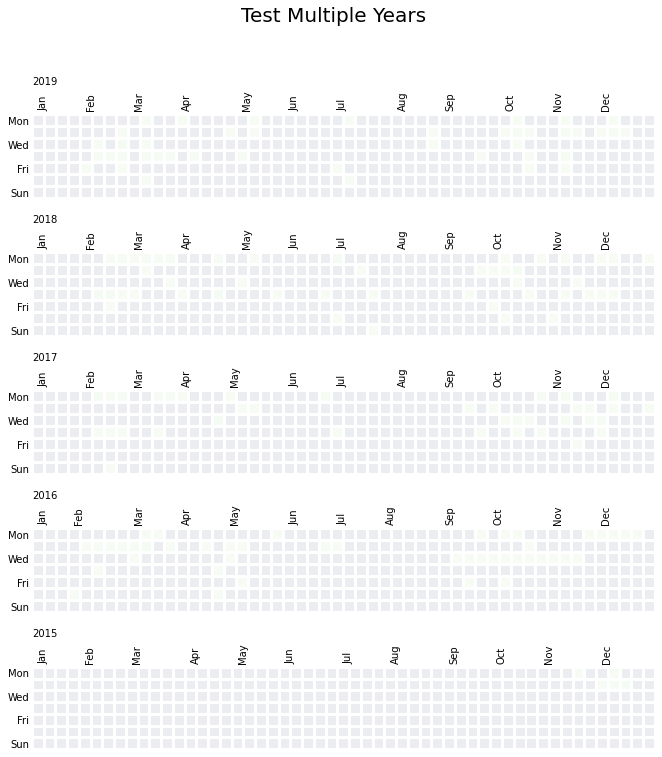

In [7]:
hm = Heatmap(input=processed_data_multiple_year)
hm.draw(title="test multiple years", width=10, height=10)